In [13]:
#Joshua Bullard
#map reduce function -- python

#input -- Movie script -> Cars (2006) downloaded from https://www.scripts.com/script/cars_5134
#output -- graph/data of top 10 letters or top 10 words used in script(user specified)
#########################################################


import string 

# Purpose: count letters/words in user given textfile 
#
# inputs:  filename  -- name of textfile to scan
#          splitType -- enter 'word' for counting words, enter 'letter' for counting letters
#
# outputs: Returns list formatted in a tupple as ["word", "count"] 

def mapReduce(filename, splitType):
  # open user specified file
  myfile = open(filename, "r")
  mydict = dict()
  
  #store each line of file. (Ignores punctuation and symbols)
  for line in myfile:
    line = line.strip()
    line = line.lower()
    line = line.translate(line.maketrans("", "", string.punctuation))
    
    #determine if user selected 'word' OR 'letter'
    split = splitType.lower()
    if split == "word":
      words = line.split()

    elif split == "letter":
      words = list(line)
    else:
        print ("ERROR: Incorrect format, please enter either 'word' or 'letter'")
        return
     
    #count occurances of word in script
    for word in words:
        if word != " ":
            if word in mydict:
                mydict[word] = mydict[word]+1
            else:
                mydict[word] = 1        
  
  # output list formatted in a tupple as ["word", "count"]
  out = []
  for key in list(mydict.keys()):
    out.append([key, mydict[key]])

  return out

In [14]:
import pandas as pd
import numpy as np

# Purpose: Print data of top 10 words/letters of script. Print graph of data. 
#
# inputs:  data  -- tupple list of words and counts
#
# outputs: Prints counts to screen and graph of data

def graphTop10(data):
    #create Pandas datafram from list
    df = pd.DataFrame(data, columns = ['index', 'count'])
    
    #Determine top 10 words/letters
    df_top10 = df.nlargest(10, 'count')
    
    #print data and graph
    print(df_top10)
    df_top10.plot.bar(x='index', y='count', rot=0)

    index  count
56    you    413
94    the    325
17      i    281
35      a    235
93     to    210
42     no    174
7     and    134
231    it    134
148    in    127
41     me    115


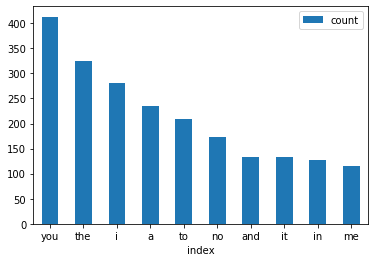

In [15]:
#TEST OUTPUT -- Top 10 words in Cars (2006) script
words = mapReduce("cars.txt", "word")
graphTop10(words)

   index  count
11     e   5094
7      o   4220
12     t   4005
1      a   3571
18     i   3481
9      n   3288
8      h   2861
2      r   2494
3      s   2421
10     l   2008


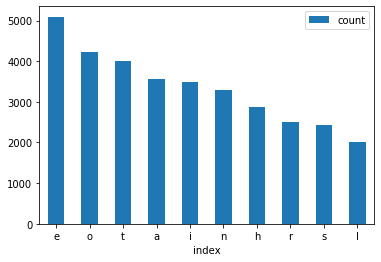

In [16]:
#TEST OUTPUT -- Top 10 letters in Cars (2006) script
letters = mapReduce("cars.txt", "letter")
graphTop10(letters)

In [17]:
#TEST OUTPUT -- Incorrect format
mapReduce("cars.txt", "testError")

ERROR: Incorrect format, please enter either 'word' or 'letter'
